In [45]:
SEED = 42
TEST_SIZE = 0.95

In [46]:
%matplotlib inline
from mlTools import dataLoader, dataSplitter, dataExplorer, dataProcessor

In [47]:
loaderObj = dataLoader()
data = loaderObj.batch_loader("./data/data.parquet",False)

In [48]:
splitterObj = dataSplitter(data)
train,test = splitterObj.train_splitter("", TEST_SIZE, SEED, False)

In [49]:
categorical = ["order_channel"]
numerical = ["product_id", "branch_id", "client_id", "sales_net", "quantity"]

In [ ]:
train = data

In [6]:
explorerObj = dataExplorer(train, categorical, numerical)
explorerObj.basic_explorer("Churn")

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
35968249,2018-11-15,2018-11-15,968276,1845492,83.981096,101,by phone,245
18528267,2018-04-24,2018-04-24,738406,2073235,20.807640,21,at the store,8796
54403291,2019-06-14,2019-06-21,539670,734583,0.442520,481,by phone,6522
53317075,2019-06-11,2019-06-11,1585719,180851,1.159200,3,by phone,7245
13159357,2018-02-22,2018-02-22,1211213,189192,19.016400,3,by phone,8324


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3165965 entries, 35968249 to 56755036
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date_order     object 
 1   date_invoice   object 
 2   product_id     int64  
 3   client_id      int64  
 4   sales_net      float64
 5   quantity       int64  
 6   order_channel  object 
 7   branch_id      int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 217.4+ MB


None

,product_id,client_id,sales_net,quantity,branch_id
count,3.165965e+06,3.165965e+06,3.165965e+06,3.165965e+06,3.165965e+06
mean,1.631153e+06,1.140460e+06,1.475606e+02,9.243178e+01,5.468701e+03
std,9.184871e+05,6.553918e+05,7.477908e+02,8.859344e+02,3.174309e+03
min,1.500000e+01,6.000000e+00,-2.441863e+05,3.000000e+00,2.000000e+01
25%,8.517370e+05,5.660300e+05,1.412200e+01,3.000000e+00,2.907000e+03
50%,1.618927e+06,1.152568e+06,4.416000e+01,5.000000e+00,5.240000e+03
75%,2.433388e+06,1.707993e+06,1.313117e+02,2.100000e+01,8.453000e+03
max,3.238762e+06,2.274517e+06,5.492952e+05,1.800010e+05,1.105700e+04


KeyError: 'Churn'

In [7]:
explorerObj.profile_explorer()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

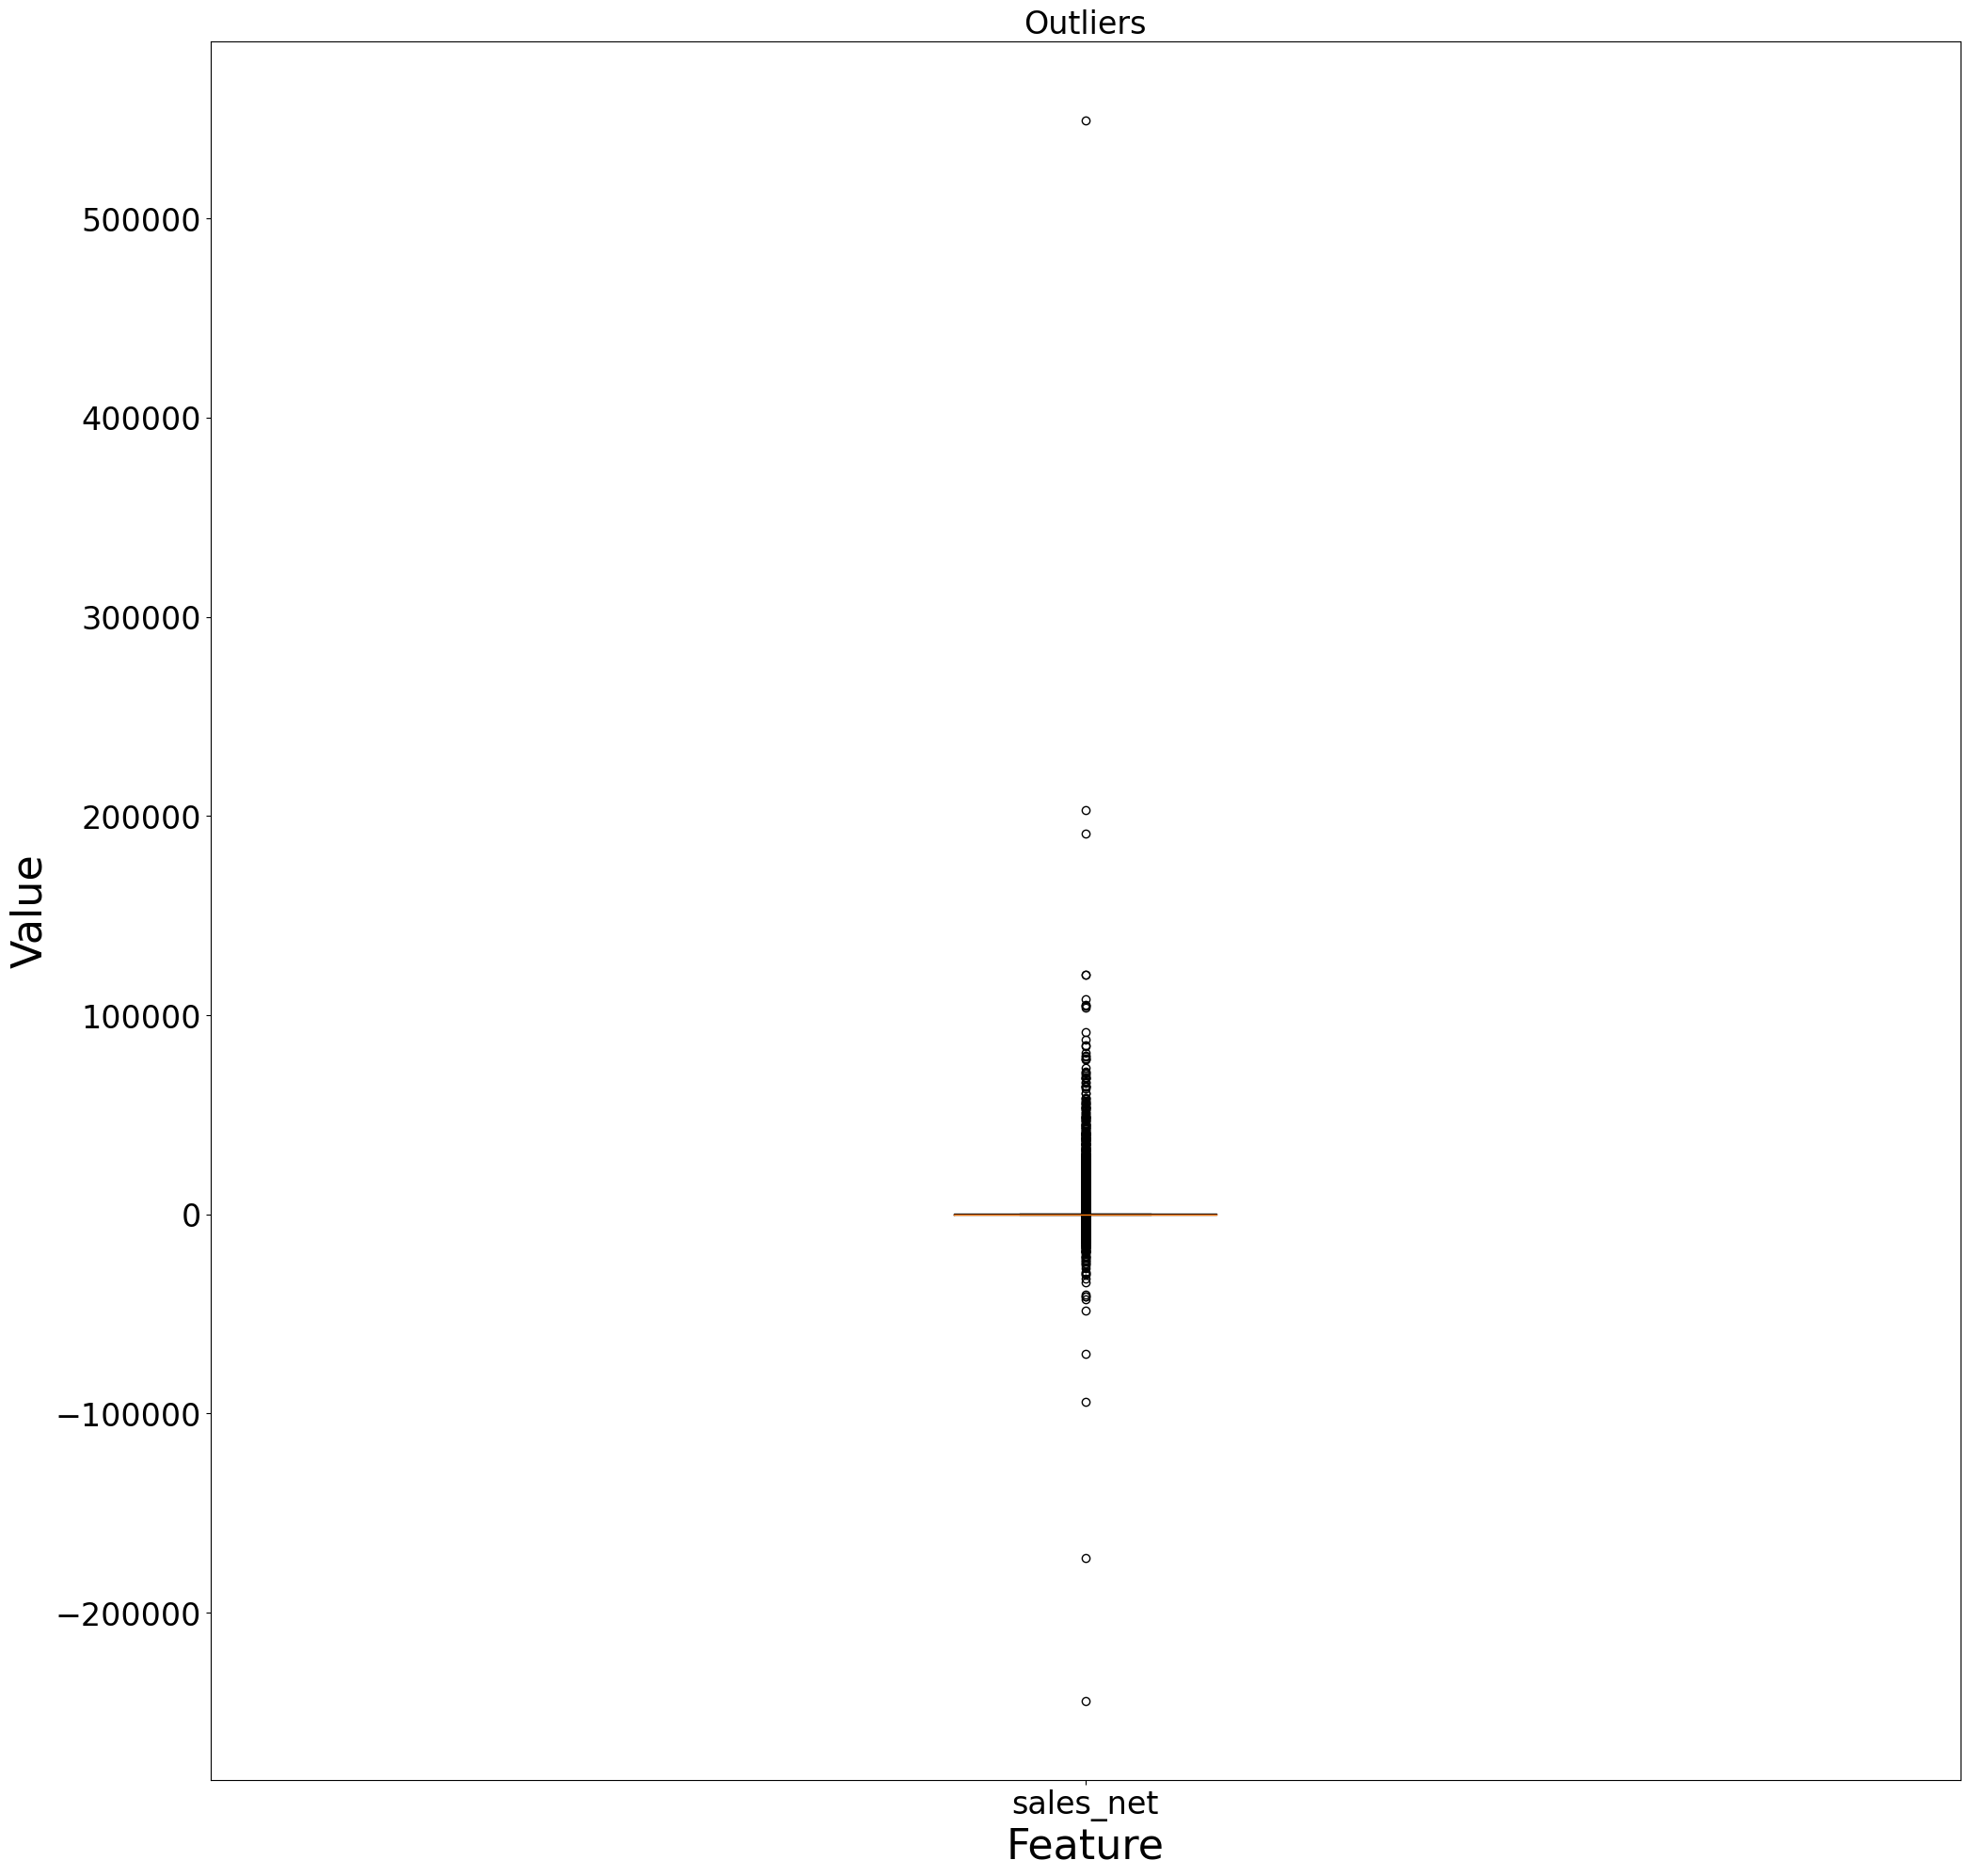

None

In [8]:
explorerObj.outlier_explorer("sales_net");

array([[<AxesSubplot:xlabel='product_id', ylabel='product_id'>,
        <AxesSubplot:xlabel='branch_id', ylabel='product_id'>,
        <AxesSubplot:xlabel='client_id', ylabel='product_id'>,
        <AxesSubplot:xlabel='sales_net', ylabel='product_id'>,
        <AxesSubplot:xlabel='quantity', ylabel='product_id'>],
       [<AxesSubplot:xlabel='product_id', ylabel='branch_id'>,
        <AxesSubplot:xlabel='branch_id', ylabel='branch_id'>,
        <AxesSubplot:xlabel='client_id', ylabel='branch_id'>,
        <AxesSubplot:xlabel='sales_net', ylabel='branch_id'>,
        <AxesSubplot:xlabel='quantity', ylabel='branch_id'>],
       [<AxesSubplot:xlabel='product_id', ylabel='client_id'>,
        <AxesSubplot:xlabel='branch_id', ylabel='client_id'>,
        <AxesSubplot:xlabel='client_id', ylabel='client_id'>,
        <AxesSubplot:xlabel='sales_net', ylabel='client_id'>,
        <AxesSubplot:xlabel='quantity', ylabel='client_id'>],
       [<AxesSubplot:xlabel='product_id', ylabel='sales_net'>,

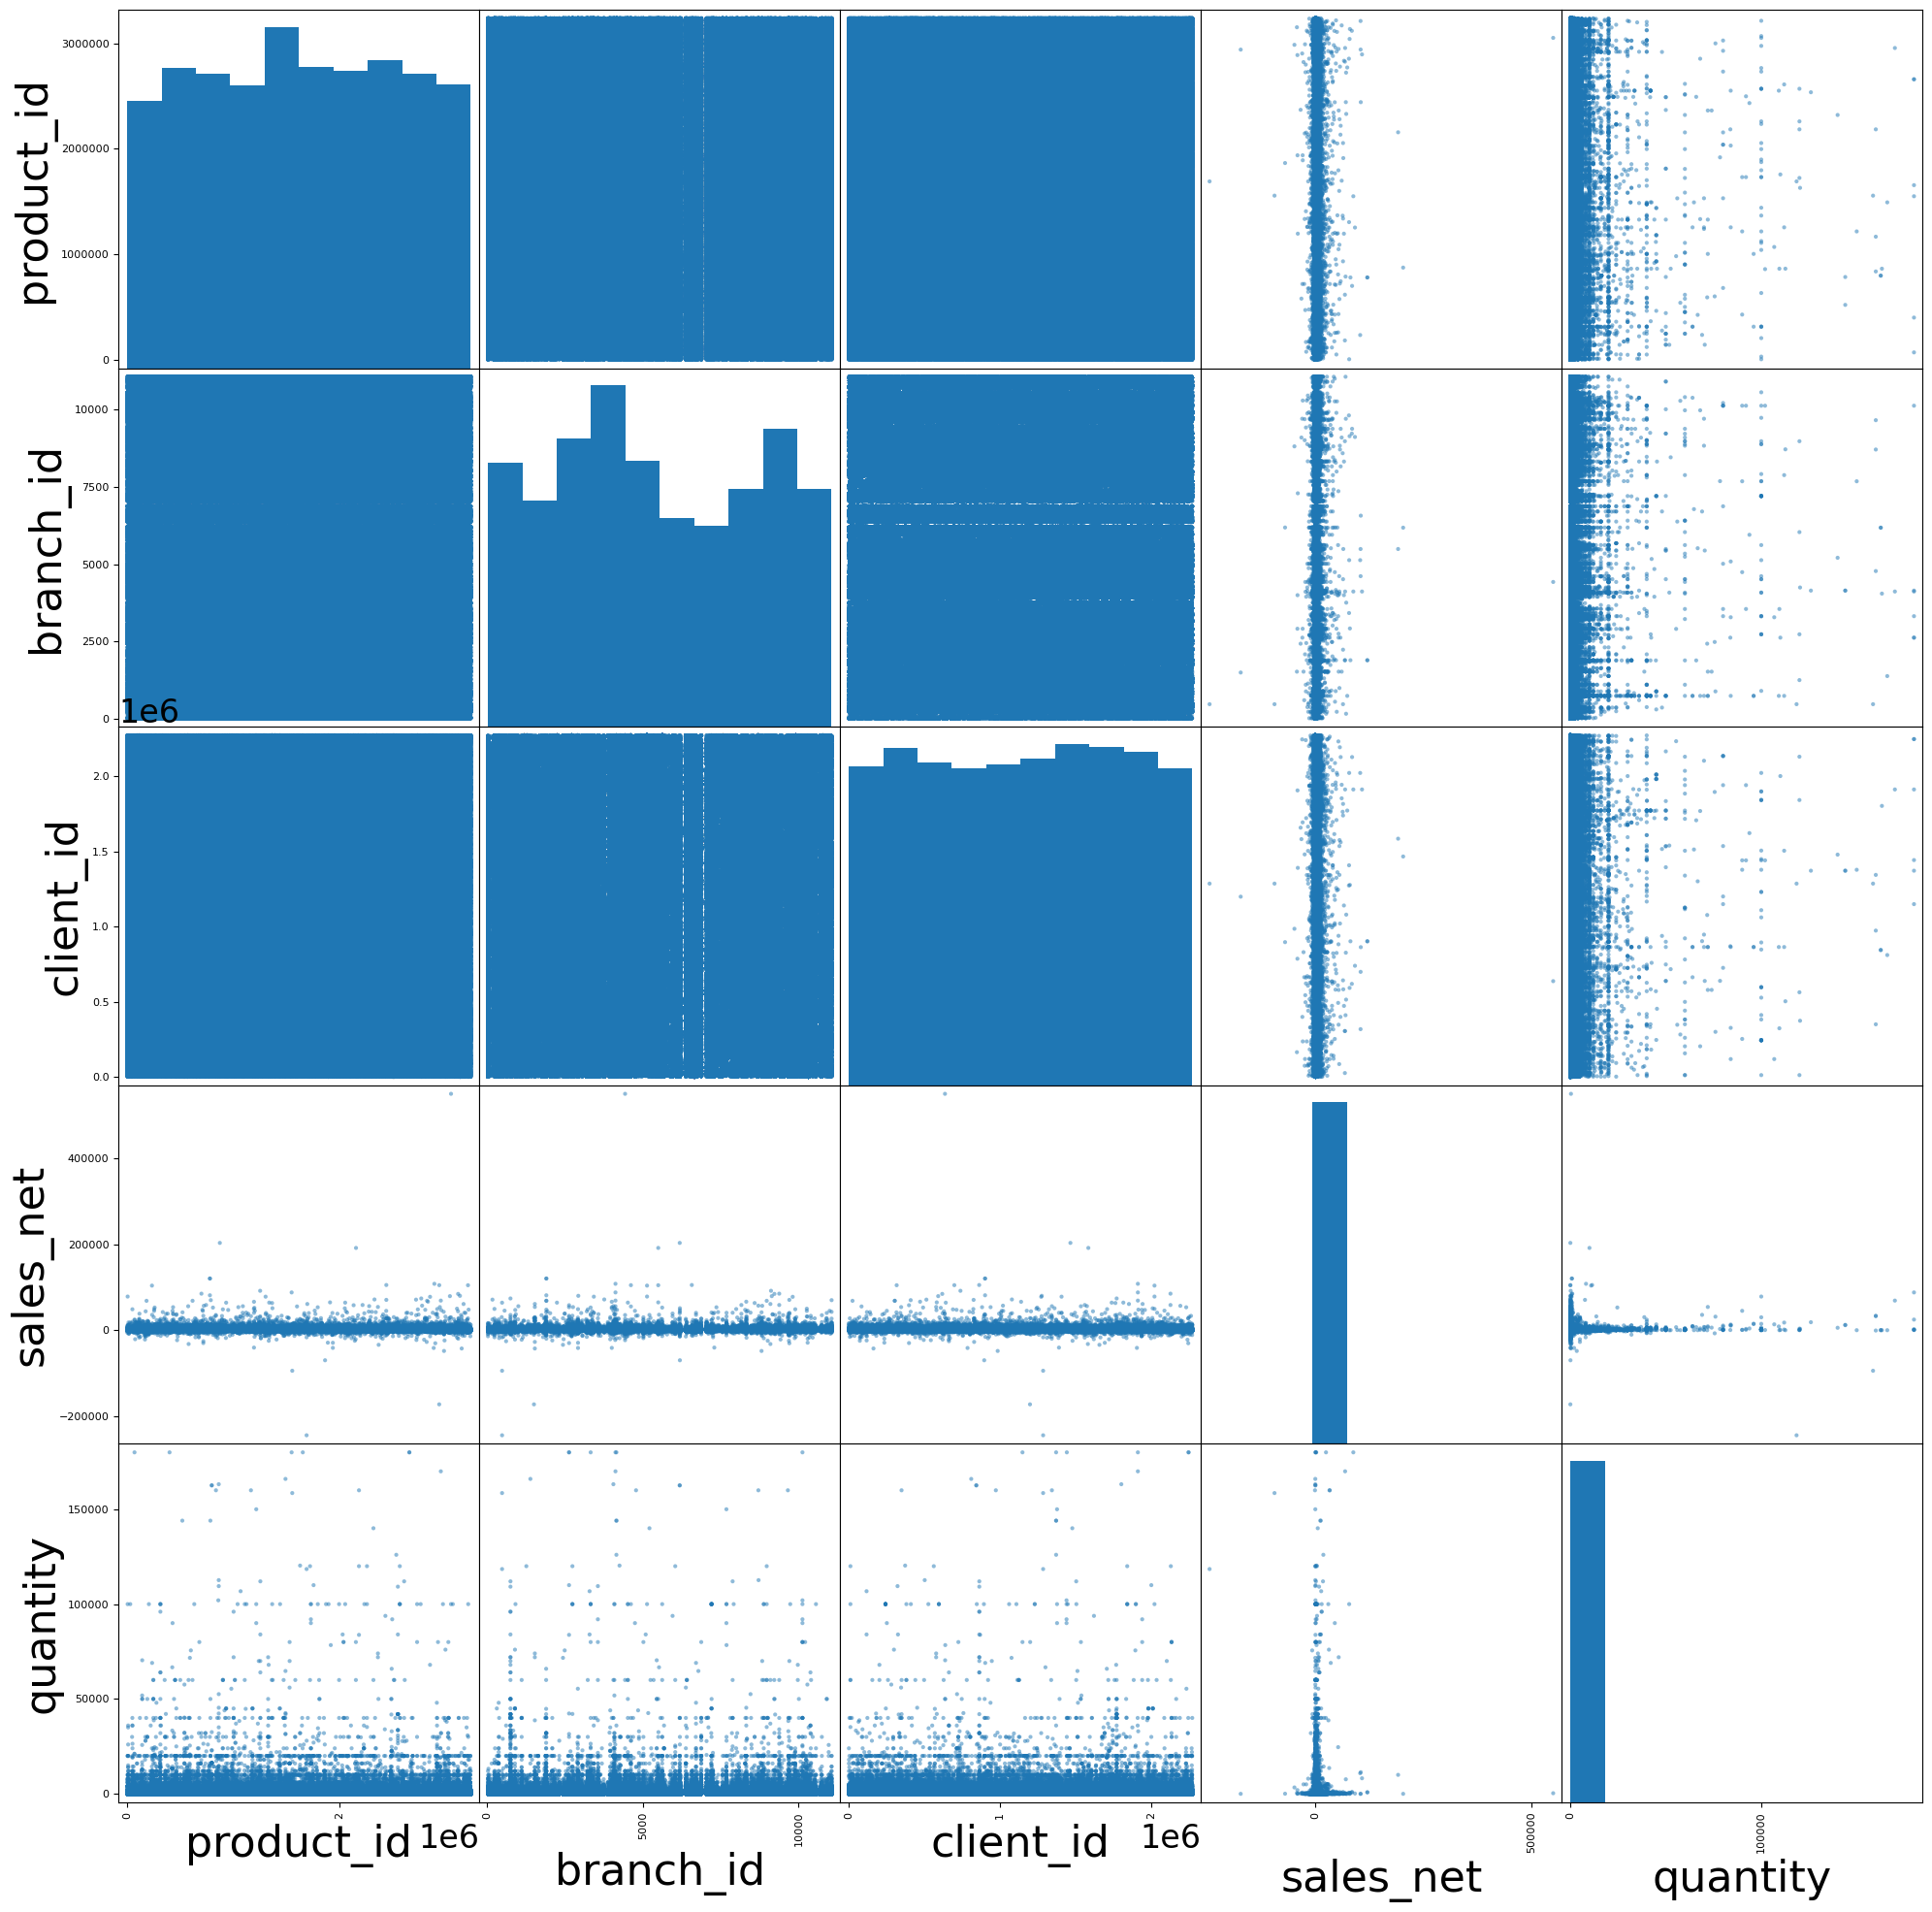

In [9]:
explorerObj.scatter_explorer(numerical, 24);

In [38]:
processorObj = dataProcessor(train, categorical, numerical)

In [ ]:
processorObj.imputer_processor(True)

In [ ]:
processorObj.outlier_processor()

In [14]:
train = processorObj.encoder_processor()

In [42]:
import numpy as np 

def extract_dates(df):
    df['data_order_year']=df['date_order'].dt.year
    df['data_order_month']=df['date_order'].dt.month_name()
    df['data_order_dayofmonth']=df['date_order'].dt.day
    df['data_order_dayofweek']=df['date_order'].dt.day_name()
    return df

def data_optimize(df):
    df.quantity= df.quantity.astype(np.int32)
    df.sales_net=df.sales_net.astype(np.float32)
    df['date_order'] =  pd.to_datetime(df['date_order'], format='%Y-%m-%d')
    df['date_invoice'] =  pd.to_datetime(df['date_invoice'], format='%Y-%m-%d')
    df.order_channel= df.order_channel.astype('category')
    return df

train=(train
.pipe(data_optimize)
.pipe(extract_dates))  
train[['data_order_month', 'data_order_year', 'data_order_dayofweek', 'data_order_dayofmonth']]=train[['data_order_month', 'data_order_year', 'data_order_dayofweek', 'data_order_dayofmonth']].astype('category')
train[['data_order_month', 'data_order_year', 'data_order_dayofweek', 'data_order_dayofmonth']]=train[['data_order_month', 'data_order_year', 'data_order_dayofweek', 'data_order_dayofmonth']].astype('category')

In [27]:
train = processorObj.scaler_processor(False, True, False)

In [39]:
import pandas as pd
train = train.drop(["product_id", "client_id", "branch_id", "data_order_dayofmonth", "data_order_year"], axis = 1)

In [43]:
train = train.join(pd.get_dummies(train["order_channel", "data_order_month", "data_order_dayofweek"]))

In [44]:
train

,date_order,date_invoice,sales_net,quantity,order_channel,data_order_year,data_order_month,data_order_dayofmonth,data_order_dayofweek,at the store,by phone,during the visit of a sales rep,online,other
35968249,2018-11-15,2018-11-15,83.981094,101,by phone,2018,November,15,Thursday,0,1,0,0,0
18528267,2018-04-24,2018-04-24,20.807640,21,at the store,2018,April,24,Tuesday,1,0,0,0,0
54403291,2019-06-14,2019-06-21,0.442520,481,by phone,2019,June,14,Friday,0,1,0,0,0
53317075,2019-06-11,2019-06-11,1.159200,3,by phone,2019,June,11,Tuesday,0,1,0,0,0
13159357,2018-02-22,2018-02-22,19.016399,3,by phone,2018,February,22,Thursday,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21081788,2018-04-09,2018-06-04,37.370399,3,at the store,2018,April,9,Monday,1,0,0,0,0
60412999,2019-08-22,2019-08-23,19.250999,5,at the store,2019,August,22,Thursday,1,0,0,0,0
56882282,2019-07-15,2019-07-15,69.496803,3,by phone,2019,July,15,Monday,0,1,0,0,0
49648910,2019-04-16,2019-04-17,40.134998,5,online,2019,April,16,Tuesday,0,0,0,1,0


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);